In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

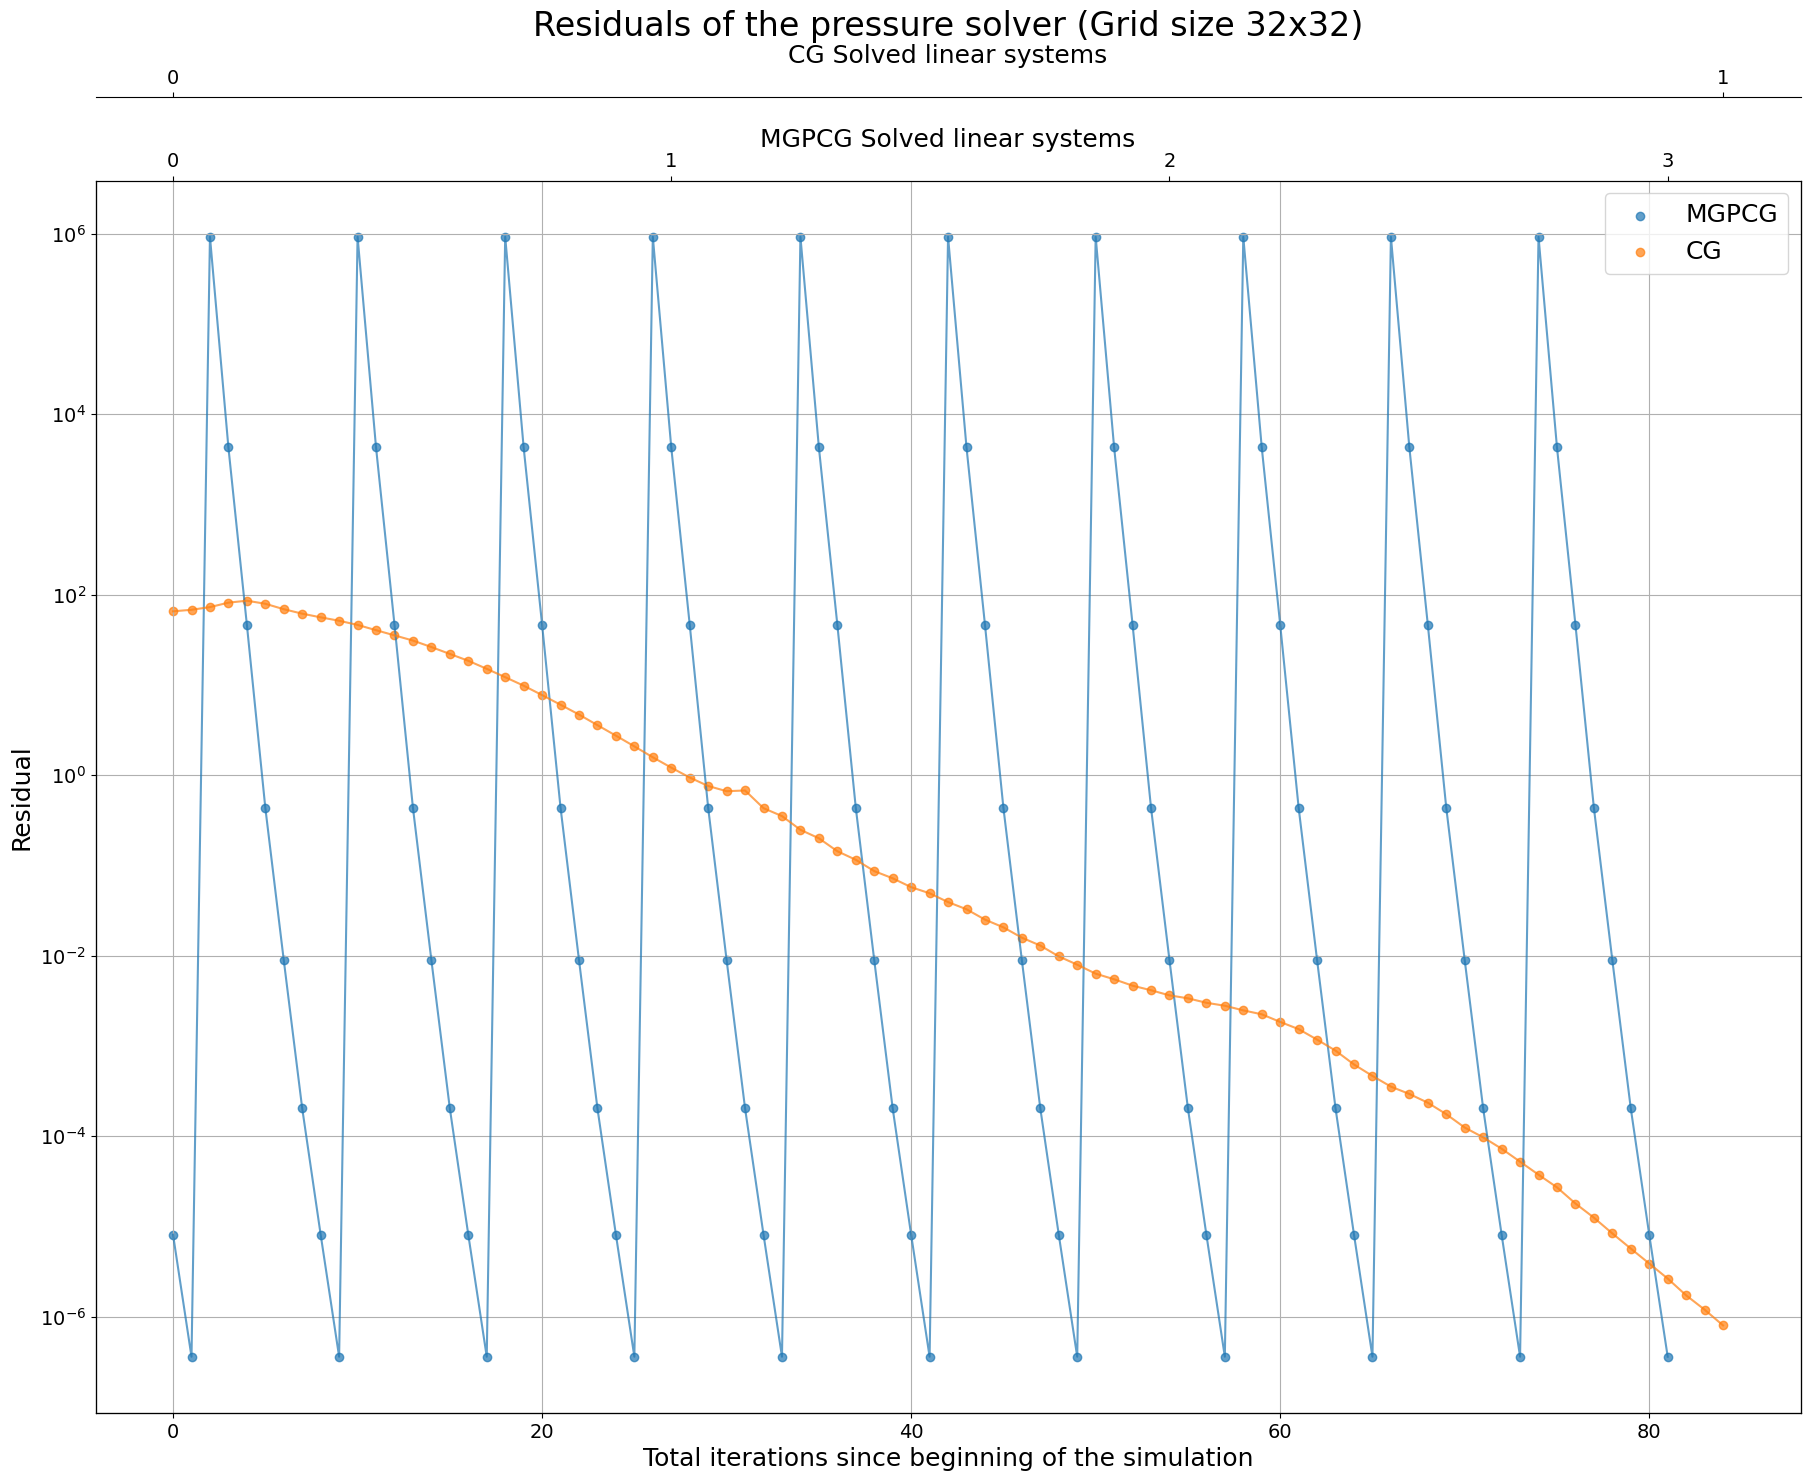

In [3]:
# Load data
mgpcg_residuals = np.loadtxt("experiments/2d/mgpcg/64/residuals_with_pressure_solver.dat")
cg_residuals = np.loadtxt("experiments/2d/conjugate_gradient/64/residuals_with_pressure_solver.dat")

# First 40 iterations
mgpcg_residuals = mgpcg_residuals[-82:]
cg_residuals = cg_residuals[-85:]

# Plot the residuals
fig, ax1 = plt.subplots(figsize=(22, 16))  # Increased figure size
ax1.set_title("Residuals of the pressure solver (Grid size 32x32)", fontsize=24)  # Larger title

# Plot lines
ax1.plot(mgpcg_residuals, alpha=0.7)
ax1.plot(cg_residuals, alpha=0.7)

# Scatter plot
ax1.scatter(np.arange(len(mgpcg_residuals)), mgpcg_residuals, label="MGPCG", alpha=0.7)
ax1.scatter(np.arange(len(cg_residuals)), cg_residuals, label="CG", alpha=0.7)

# Set y-axis scale to logarithmic
ax1.set_yscale("log")
ax1.set_ylabel("Residual", fontsize=18)  # Larger ylabel
ax1.set_xlabel("Total iterations since beginning of the simulation", fontsize=18)  # Larger xlabel
ax1.tick_params(axis='both', which='major', labelsize=14)  # Larger tick labels
ax1.legend(fontsize=18)  # Larger legend

# Add secondary x-axes at the bottom
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
mgpcg_ticks = np.linspace(0, len(mgpcg_residuals) - 1, num=4)
ax2.set_xticks(mgpcg_ticks)
ax2.set_xticklabels([0,1,2,3], fontsize=14)  # Larger tick labels
ax2.set_xlabel("MGPCG Solved linear systems", fontsize=18)  # Larger xlabel

ax3 = ax1.twiny()
ax3.spines['top'].set_position(('outward', 60))
ax3.set_xlim(ax1.get_xlim())
cg_ticks = np.linspace(0, len(cg_residuals) - 1, num=2)
ax3.set_xticks(cg_ticks)
ax3.set_xticklabels([0,1], fontsize=14)  # Larger tick labels
ax3.set_xlabel("CG Solved linear systems", fontsize=18)  # Larger xlabel

# Add grid lines
ax1.grid(True)

# Save and show plot
plt.savefig("residuals_pressure_solver_32x32.pdf", format="pdf")
plt.show()

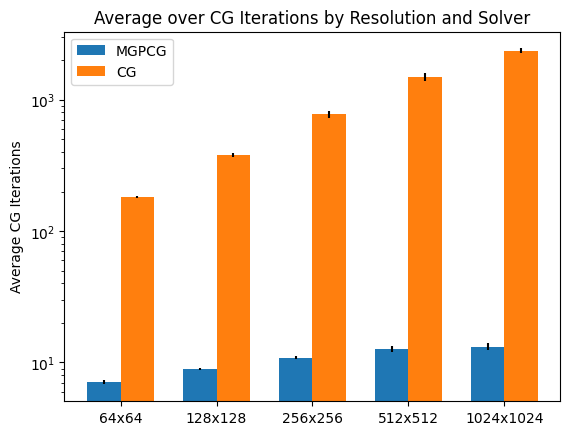

In [4]:
# Load data
resolutions = ['64x64', '128x128', '256x256', '512x512', '1024x1024']
single_resolutions = ['64', '128', '256', '512', '1024']
mgpcg_data = []
cg_data = []

for res in single_resolutions:
    mgpcg_data.append(np.loadtxt(f"experiments/2d/mgpcg/{res}/n_cg_over_it.dat"))
    cg_data.append(np.loadtxt(f"experiments/2d/conjugate_gradient/{res}/n_cg_over_it.dat"))

# Calculate average and standard deviation for each resolution
mgpcg_avg = [np.mean(data, axis=0) for data in mgpcg_data]
cg_avg = [np.mean(data, axis=0) for data in cg_data]
mgpcg_std = [np.std(data, axis=0) for data in mgpcg_data]
cg_std = [np.std(data, axis=0) for data in cg_data]

# Plotting
labels = ['64x64', '128x128', '256x256', '512x512', '1024x1024']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mgpcg_avg, width, label='MGPCG', yerr=mgpcg_std)
rects2 = ax.bar(x + width/2, cg_avg, width, label='CG', yerr=cg_std)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average CG Iterations')
ax.set_title('Average over CG Iterations by Resolution and Solver')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yscale("log")
ax.legend()
plt.savefig("average_cg_iterations.pdf", format="pdf")
plt.show()

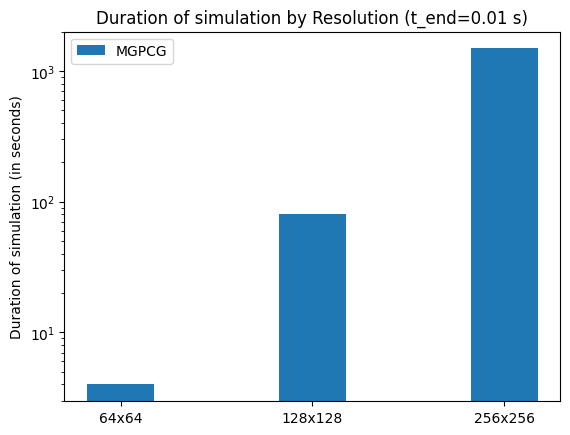

In [13]:
# Load data
resolutions = ['64x64', '128x128', '256x256']
single_resolutions = ['64', '128', '256']
mgpcg_data = []

for res in single_resolutions:
    mgpcg_data.append(np.loadtxt(f"experiments/2d/mgpcg/{res}/residuals_over_time.dat"))

# Get the last item of each array
mgpcg_duration = [len(data) for data in mgpcg_data]

# Plotting
labels = ['64x64', '128x128', '256x256']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, mgpcg_duration, width, label='MGPCG')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration of simulation (in seconds)')
ax.set_yscale("log")
ax.set_title('Duration of simulation by Resolution (t_end=0.01 s)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# dont lay legend over bars
ax.legend(loc='upper left')
plt.savefig("duration_of_simulation.pdf", format="pdf")
plt.show()

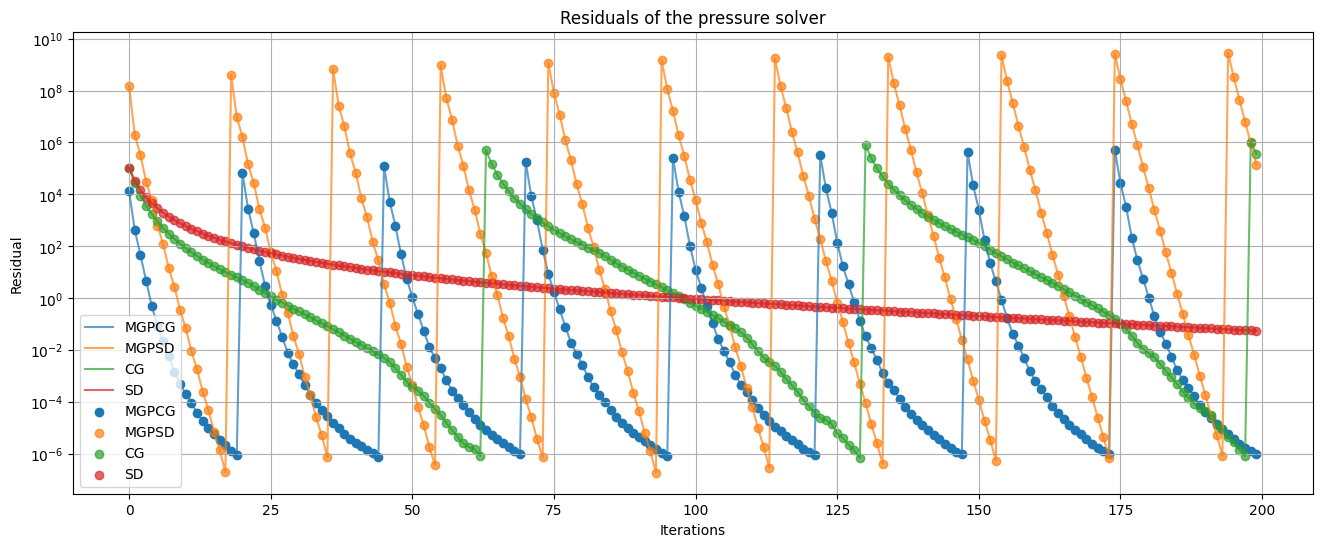

In [ ]:
mgpcg_residuals = np.loadtxt("experiments/2d/mgpcg/residuals_with_pressure_solver.dat")
mgpsd_residuals = np.loadtxt("experiments/2d/mgpsd/residuals_with_pressure_solver.dat")
cg_residuals = np.loadtxt("experiments/2d/conjugate_gradient/residuals_with_pressure_solver.dat")
sd_residuals = np.loadtxt("experiments/2d/steepest_descent/residuals_with_pressure_solver.dat")

# first 40 iterations
mgpcg_residuals = mgpcg_residuals[:200]
mgpsd_residuals = mgpsd_residuals[:200]
cg_residuals = cg_residuals[:200]
sd_residuals = sd_residuals[:200]

# Plot the residuals

# Set title ()
plt.figure(figsize=(16, 6))
plt.title("Residuals of the pressure solver")
plt.plot(mgpcg_residuals, label="MGPCG", alpha=0.7)
plt.plot(mgpsd_residuals, label="MGPSD", alpha=0.7)
plt.plot(cg_residuals, label="CG", alpha=0.7)
plt.plot(sd_residuals, label="SD", alpha=0.7)
# scatter plot
plt.scatter(np.arange(len(mgpcg_residuals)), mgpcg_residuals, label="MGPCG")
plt.scatter(np.arange(len(mgpsd_residuals)), mgpsd_residuals, label="MGPSD", alpha=0.7)
plt.scatter(np.arange(len(cg_residuals)), cg_residuals, label="CG", alpha=0.7)
plt.scatter(np.arange(len(sd_residuals)), sd_residuals, label="SD", alpha=0.7)

plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual")
plt.legend()
# grid lines
plt.grid(True)
plt.show()

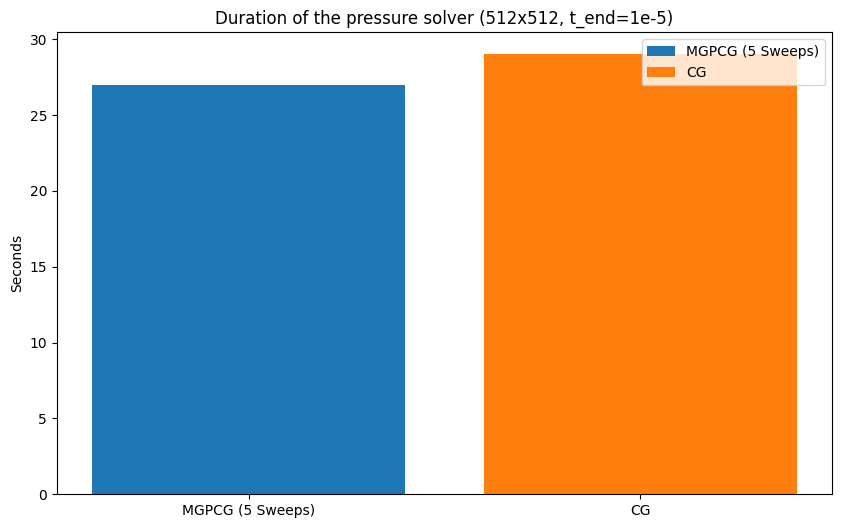

In [7]:
# plot bar charts of number of iterations
#mgpcg_2_duration = len(np.loadtxt("experiments/2d/mgpcg/2_sweeps/residuals_over_time.dat"))
mgpcg_5_duration = len(np.loadtxt("experiments/2d/mgpcg/5_sweeps/residuals_over_time.dat"))
cg_duration = len(np.loadtxt("experiments/2d/conjugate_gradient/residuals_over_time.dat"))
fig, ax = plt.subplots(figsize=(10, 6))
#ax.bar("MGPCG (2 Sweeps)", mgpcg_2_duration, label="MGPCG (2 Sweeps)")
ax.bar("MGPCG (5 Sweeps)", mgpcg_5_duration, label="MGPCG (5 Sweeps)")
ax.bar("CG", cg_duration, label="CG")
plt.title("Duration of the pressure solver (512x512, t_end=1e-5)")
plt.ylabel("Seconds")
plt.legend()
plt.show()

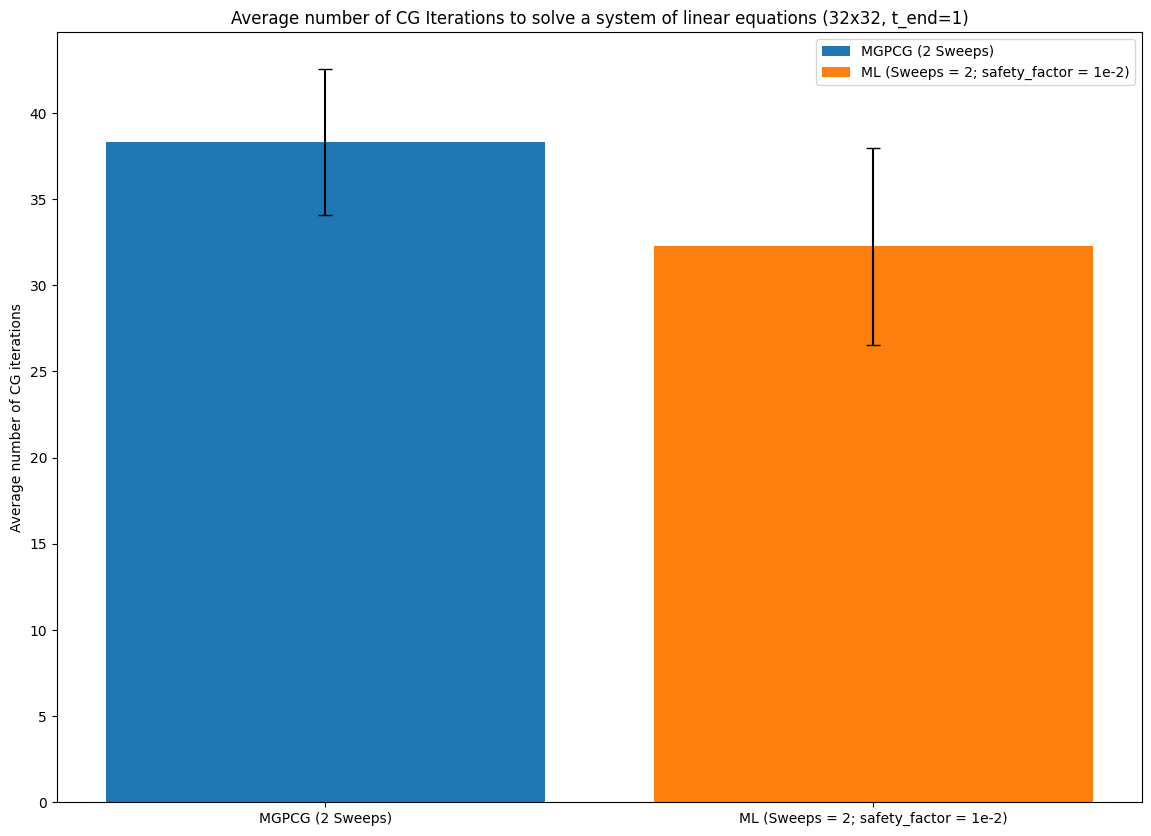

In [18]:
n_cg_mgpcg = np.loadtxt("experiments/2d/mgpcg/n_cg_over_it.dat")
n_cg_ml = np.loadtxt("experiments/2d/ml/n_cg_over_it.dat")

# Calculate average and standard deviation
n_cg_mgpcg_avg = np.mean(n_cg_mgpcg, axis=0)
n_cg_ml_avg = np.mean(n_cg_ml, axis=0)
n_cg_mgpcg_std = np.std(n_cg_mgpcg, axis=0)
n_cg_ml_std = np.std(n_cg_ml, axis=0)

# Plot the residuals
fig, ax = plt.subplots(figsize=(14, 10))
ax.bar("MGPCG (2 Sweeps)", n_cg_mgpcg_avg, yerr=n_cg_mgpcg_std, label="MGPCG (2 Sweeps)", capsize=5)
ax.bar("ML (Sweeps = 2; safety_factor = 1e-2)", n_cg_ml_avg, yerr=n_cg_ml_std, label="ML (Sweeps = 2; safety_factor = 1e-2)", capsize=5)
plt.title("Average number of CG Iterations to solve a system of linear equations (32x32, t_end=1)")
plt.ylabel("Average number of CG iterations")
plt.legend()
plt.show()

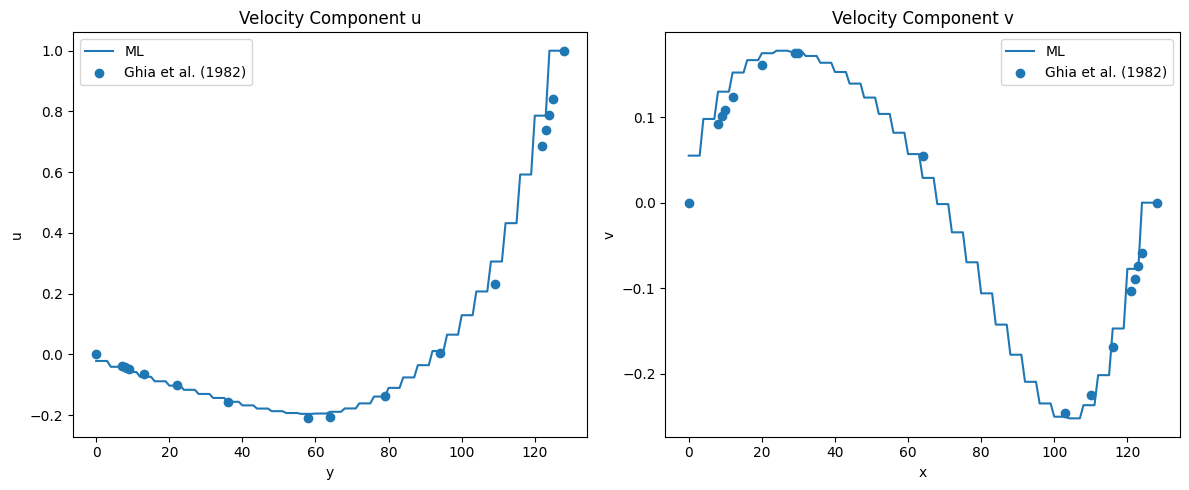

In [ ]:
# Ghia et al. (1982) - Re = 100
reference_ux_RE_100 = {
    128: 1.00000,
    125: 0.84123,
    124: 0.78871,
    123: 0.73722,
    122: 0.68717,
    109: 0.23151,
    94: 0.00332,
    79: -0.13641,
    64: -0.20581,
    58: -0.21090,
    36: -0.15662,
    22: -0.10150,
    13: -0.06434,
    9: -0.04775,
    8: -0.04192,
    7: -0.03717,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 100
reference_uy_RE_100 = {
    128: 0.00000,
    124: -0.05906,
    123: -0.07391,
    122: -0.08864,
    121: -0.10313,
    116: -0.16914,
    110: -0.22445,
    103: -0.24533,
    64: 0.05454,
    30: 0.17527,
    29: 0.17507,
    20: 0.16077,
    12: 0.12317,
    10: 0.10890,
    9: 0.10091,
    8: 0.09233,
    0: 0.00000
}

u_ml = np.loadtxt("experiments/2d/ml/u.dat")
v_ml = np.loadtxt("experiments/2d/ml/v.dat")

u_ml = u_ml[1:-1, 1:-1]
v_ml = v_ml[1:-1, 1:-1]

scale_factor = 4
u_ml = np.kron(u_ml, np.ones((scale_factor, scale_factor)))
v_ml = np.kron(v_ml, np.ones((scale_factor, scale_factor)))

# plot u
u_ml = u_ml[:, int(u_ml.shape[1]/2)]
v_ml = v_ml[int(v_ml.shape[0]/2), :]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# Plot u and its reference
axes[0].plot(u_ml, label="ML")
axes[0].scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label="Ghia et al. (1982)")
axes[0].set_title("Velocity Component u")
axes[0].set_xlabel("y")
axes[0].set_ylabel("u")
axes[0].legend()

# Plot v and its reference
axes[1].plot(v_ml, label="ML")
# plot v_mid as scatter plot
axes[1].scatter(reference_uy_RE_100.keys(), reference_uy_RE_100.values(), label="Ghia et al. (1982)")
axes[1].set_title("Velocity Component v")
axes[1].set_xlabel("x")
axes[1].set_ylabel("v")
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("ghia_32_ml.pdf", format="pdf")
plt.show()